In [1]:
import pandas as pd
import numpy as np
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('Tugas 1_NIM Genap_Modul 4.csv')
df.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


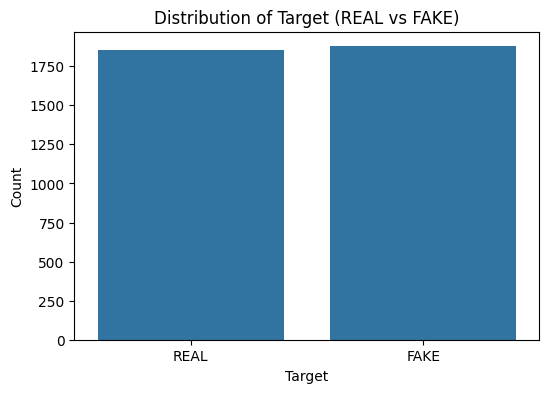

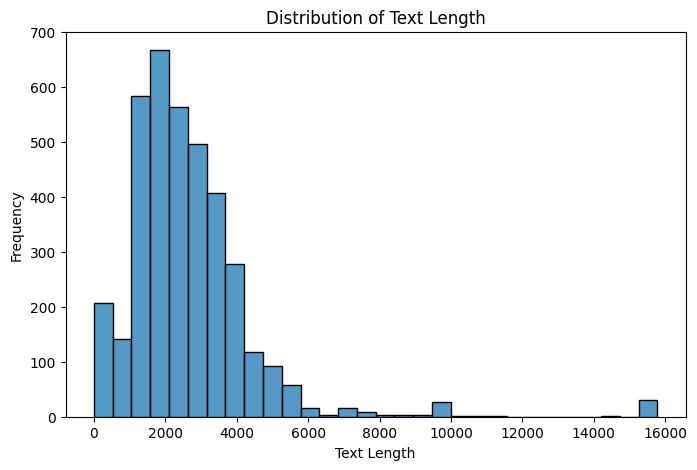

In [4]:
df.info()

df.isnull().sum()
df['label'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Target (REAL vs FAKE)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

df['text'] = df['text'].fillna('') 
df['text_length'] = df['text'].apply(len)
df['text_length'].describe()

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [5]:
df['text'] = df['text'].astype(str).fillna('')

df['tweet_text_cleaned'] = df['text'].str.lower()

df['tweet_text_cleaned'] = df['tweet_text_cleaned'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

df['tweet_text_cleaned'] = df['tweet_text_cleaned'].apply(lambda x: emoji.replace_emoji(x, replace=''))

df['tweet_text_cleaned'] = df['tweet_text_cleaned'].apply(lambda x: ' '.join(x.split()))

df[['text', 'tweet_text_cleaned']].head()

,text,tweet_text_cleaned
0,Payal has accused filmmaker Anurag Kashyap of ...,payal has accused filmmaker anurag kashyap of ...
1,A four-minute-long video of a woman criticisin...,a fourminutelong video of a woman criticising ...
2,"Republic Poll, a fake Twitter account imitatin...",republic poll a fake twitter account imitating...
3,"Delhi teen finds place on UN green list, turns...",delhi teen finds place on un green list turns ...
4,Delhi: A high-level meeting underway at reside...,delhi a highlevel meeting underway at residenc...


In [6]:
df['tokens'] = df['tweet_text_cleaned'].apply(word_tokenize)
df[['tweet_text_cleaned', 'tokens']].head()

,tweet_text_cleaned,tokens
0,payal has accused filmmaker anurag kashyap of ...,"[payal, has, accused, filmmaker, anurag, kashy..."
1,a fourminutelong video of a woman criticising ...,"[a, fourminutelong, video, of, a, woman, criti..."
2,republic poll a fake twitter account imitating...,"[republic, poll, a, fake, twitter, account, im..."
3,delhi teen finds place on un green list turns ...,"[delhi, teen, finds, place, on, un, green, lis..."
4,delhi a highlevel meeting underway at residenc...,"[delhi, a, highlevel, meeting, underway, at, r..."


In [7]:
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df[['tokens', 'tokens_no_stopwords']].head()

,tokens,tokens_no_stopwords
0,"[payal, has, accused, filmmaker, anurag, kashy...","[payal, accused, filmmaker, anurag, kashyap, b..."
1,"[a, fourminutelong, video, of, a, woman, criti...","[fourminutelong, video, woman, criticising, go..."
2,"[republic, poll, a, fake, twitter, account, im...","[republic, poll, fake, twitter, account, imita..."
3,"[delhi, teen, finds, place, on, un, green, lis...","[delhi, teen, finds, place, un, green, list, t..."
4,"[delhi, a, highlevel, meeting, underway, at, r...","[delhi, highlevel, meeting, underway, residenc..."


In [8]:
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df[['tokens_no_stopwords', 'stemmed_tokens']].head()

,tokens_no_stopwords,stemmed_tokens
0,"[payal, accused, filmmaker, anurag, kashyap, b...","[payal, accus, filmmak, anurag, kashyap, behav..."
1,"[fourminutelong, video, woman, criticising, go...","[fourminutelong, video, woman, criticis, gover..."
2,"[republic, poll, fake, twitter, account, imita...","[republ, poll, fake, twitter, account, imit, a..."
3,"[delhi, teen, finds, place, un, green, list, t...","[delhi, teen, find, place, un, green, list, tu..."
4,"[delhi, highlevel, meeting, underway, residenc...","[delhi, highlevel, meet, underway, resid, rajy..."


In [9]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['stemmed_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df[['stemmed_tokens', 'lemmatized_tokens']].head()

,stemmed_tokens,lemmatized_tokens
0,"[payal, accus, filmmak, anurag, kashyap, behav...","[payal, accus, filmmak, anurag, kashyap, behav..."
1,"[fourminutelong, video, woman, criticis, gover...","[fourminutelong, video, woman, criticis, gover..."
2,"[republ, poll, fake, twitter, account, imit, a...","[republ, poll, fake, twitter, account, imit, a..."
3,"[delhi, teen, find, place, un, green, list, tu...","[delhi, teen, find, place, un, green, list, tu..."
4,"[delhi, highlevel, meet, underway, resid, rajy...","[delhi, highlevel, meet, underway, resid, rajy..."


In [10]:
df['tweet_text'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))
df[['tweet_text']].head()

,tweet_text
0,payal accus filmmak anurag kashyap behav inapp...
1,fourminutelong video woman criticis govern ant...
2,republ poll fake twitter account imit arnab go...
3,delhi teen find place un green list turn glass...
4,delhi highlevel meet underway resid rajya sabh...


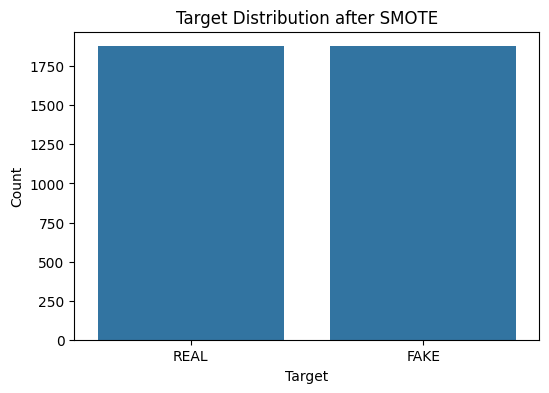

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['tweet_text']).toarray()
y = df['label'].map({'REAL': 1, 'FAKE': 0})  

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=tfidf_vectorizer.get_feature_names_out())
y_resampled_df = pd.Series(y_resampled).map({1: 'REAL', 0: 'FAKE'}).reset_index(drop=True)

df_resampled = X_resampled_df.copy()
df_resampled['target'] = y_resampled_df.values  

df_resampled['target'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_resampled)
plt.title('Target Distribution after SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()